In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [190]:
n_grid = 10

In [194]:
def get_neighbors(loc):
    neighbors = []
    # left
    if 0 < loc % n_grid:
        neighbors.append(loc-1)
    # right
    if loc % n_grid < n_grid-1:
        neighbors.append(loc+1)
    # up
    if n_grid < loc:
        neighbors.append(loc-n_grid)
    # down
    if loc < (n_grid-1) * n_grid:
        neighbors.append(loc+n_grid)
        
    return neighbors


def get_pos(index):
    return index%n_grid+.5, index//n_grid+.5


def draw_edge(edge):
    plt.plot(*np.array([get_pos(i) for i in edge]).T, color='k')


def draw_paths(edges):
    for edge in edges:
        draw_edge(edge)

    plt.rcParams['figure.figsize'] = [3,3] 
    plt.grid()
    plt.axis([0,n_grid,0,n_grid])
    plt.show()

# draw_paths(edges)


def draw_wall(dual_edge):
    p1 = np.array(get_pos(dual_edge[0]))
    p2 = np.array(get_pos(dual_edge[1]))
    centroid = (p1 + p2)/2
    # vertical edge
    if p1[0] == p2[0]:
        plt.plot([centroid[0]-.5, centroid[0]+.5], [centroid[1], centroid[1]], color='k')
        
    # horizontal edge
    if p1[1] == p2[1]:
        plt.plot([centroid[0], centroid[0]], [centroid[1]-.5, centroid[1]+.5], color='k')

        
def draw_maze(edges):
    plt.hlines([0,n_grid], 0, n_grid, color='k', lw=3)
    plt.vlines([0,n_grid], 0, n_grid, color='k', lw=3)
    
    all_edges = sum([[(i,j) for j in get_neighbors(i) if j > i] for i in range(n_grid**2)], [])
    
    for edge in all_edges:
        if edge not in edges:
            draw_wall(edge)

    plt.rcParams['figure.figsize'] = [3,3] 
    plt.grid()
    plt.axis([0,n_grid+.1,-.1,n_grid])
    
    
# all_edges = sum([[(i,j) for j in get_neighbors(i) if j > i] for i in range(n_grid**2)], [])

## Self Avoiding Walk:

(0.0, 10.0, 0.0, 10.0)

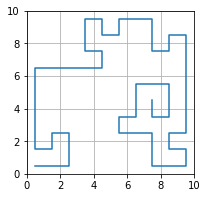

In [28]:
def step_to(loc):
    history.append(loc)
    neighbors = get_neighbors(loc)
    possible_steps = list(set(neighbors) - set(history))
    if len(possible_steps) > 0:
        new_loc = random.choice(possible_steps)
        step_to(new_loc)


history = []

step_to(0)

positions = np.array([get_pos(i) for i in history])

plt.rcParams['figure.figsize'] = [3,3] 
plt.plot(*positions.T)
plt.grid()
plt.axis([0,n_grid,0,n_grid])

## Randomized DFS

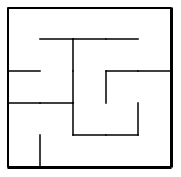

In [196]:
def generate_maze():
    history = []
    edges = []

    def step_to(loc):
        history.append(loc)
        neighbors = get_neighbors(loc)
        possible_steps = list(set(neighbors) - set(history))
        if len(possible_steps) > 0:
            random.shuffle(possible_steps)
            for new_loc in possible_steps:
                if new_loc in history:
                    continue
                edges.append((loc, new_loc))
                step_to(new_loc)

    step_to(0)
    
    return [tuple(sorted(e)) for e in edges]

edges = generate_maze()

draw_maze(edges)
plt.axis('off'); plt.show()

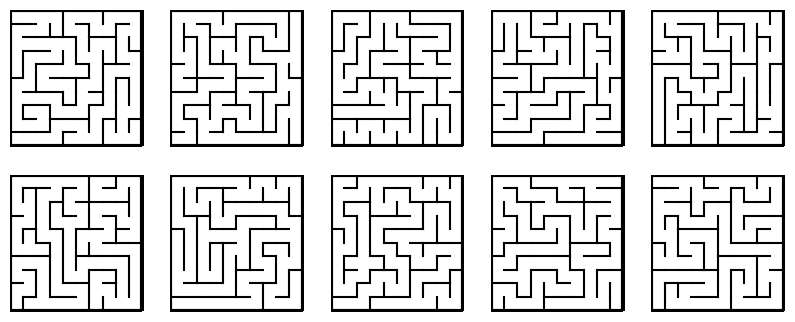

In [228]:
n_grid=10

plt.figure(figsize=[10,4], dpi=100)
for i in range(10):
    plt.subplot(2,5,i+1)
    edges = generate_maze()
    draw_maze(edges)
    plt.axis('off')
    
# plt.suptitle(f'Random {n_grid}x{n_grid} mazes')
# plt.savefig('10x10_mazes.png', bbox_inches='tight')

## Making "block mazes"

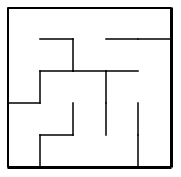

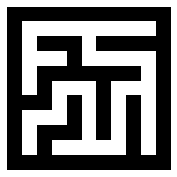

In [169]:
draw_maze(edges)
plt.axis('off'); plt.show()

def get_block_maze(edges, padded=True):
    maze = np.tile(np.array([[0,1],[1,1]]), (n_grid, n_grid))[:-1,:-1]
    padded_maze = np.pad(maze, 1, 'constant', constant_values=1)

    for edge in edges:
        a,b = np.unravel_index(edge, (n_grid, n_grid))
        a,b = [np.array(x) for x in zip(a,b)]
        padded_maze[tuple(a+b+1)] = 0

    if padded: 
        return padded_maze
    else:
        return padded_maze[1:-1, 1:-1]
    
padded_maze = get_block_maze(edges)

plt.imshow(np.flip(padded_maze, 0), cmap='gray_r')
plt.axis('off'); plt.show()

## Remove a fraction of the walls

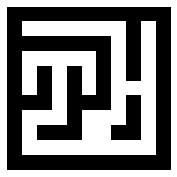

In [192]:
n_grid = 5
edges = generate_maze()
maze = get_block_maze(edges, padded=False)
maze = maze * np.random.random(maze.shape) > .05
padded_maze = np.pad(maze, 1, 'constant', constant_values=1)
plt.imshow(padded_maze, cmap='gray_r')
plt.axis('off'); plt.show()

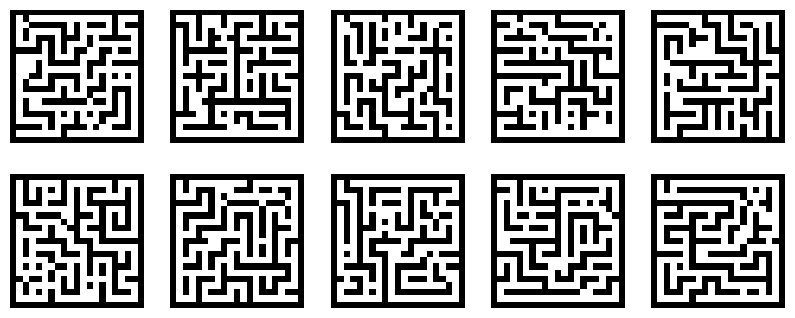

In [205]:
plt.figure(figsize=[10,4], dpi=100)
for i in range(10):
    plt.subplot(2,5,i+1)
    edges = generate_maze()
    maze = get_block_maze(edges, padded=False)
    maze = maze * np.random.random(maze.shape) > .1
    padded_maze = np.pad(maze, 1, 'constant', constant_values=1)
    plt.imshow(padded_maze, cmap='gray_r')
    plt.axis('off')

# Generating a set of mazes

We will generate unpadded 5x5 mazes to start

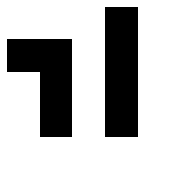

In [229]:
n_grid = 3
edges = generate_maze()
maze = get_block_maze(edges, padded=False)
plt.imshow(maze, cmap='gray_r')
plt.axis('off'); plt.show()

In [230]:
n_grid = 3

generate_block_maze = lambda : get_block_maze(generate_maze(), padded=False)

mazes = np.array([generate_block_maze() for _ in range(1024)])

np.save('5x5_block_mazes.npy', mazes)